In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('Desktop/fisher_iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape
#dataset contains 5 attributes with 150 data. 

(150, 5)

In [4]:
#checking for null values
df.isnull().sum()

#data does not contain any null values.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [6]:
#let's define a function call scatterplot, to see how feature set is related to each other
def scatterplotmatrix():
    count=1
    plt.figure(figsize=(20,20))
    for i in df.columns:
        for k in df.columns:
            if count<17:
                plt.subplot(4,4,count)
                sns.scatterplot(df[i],df[k],hue=df['species'])
            count+=1 

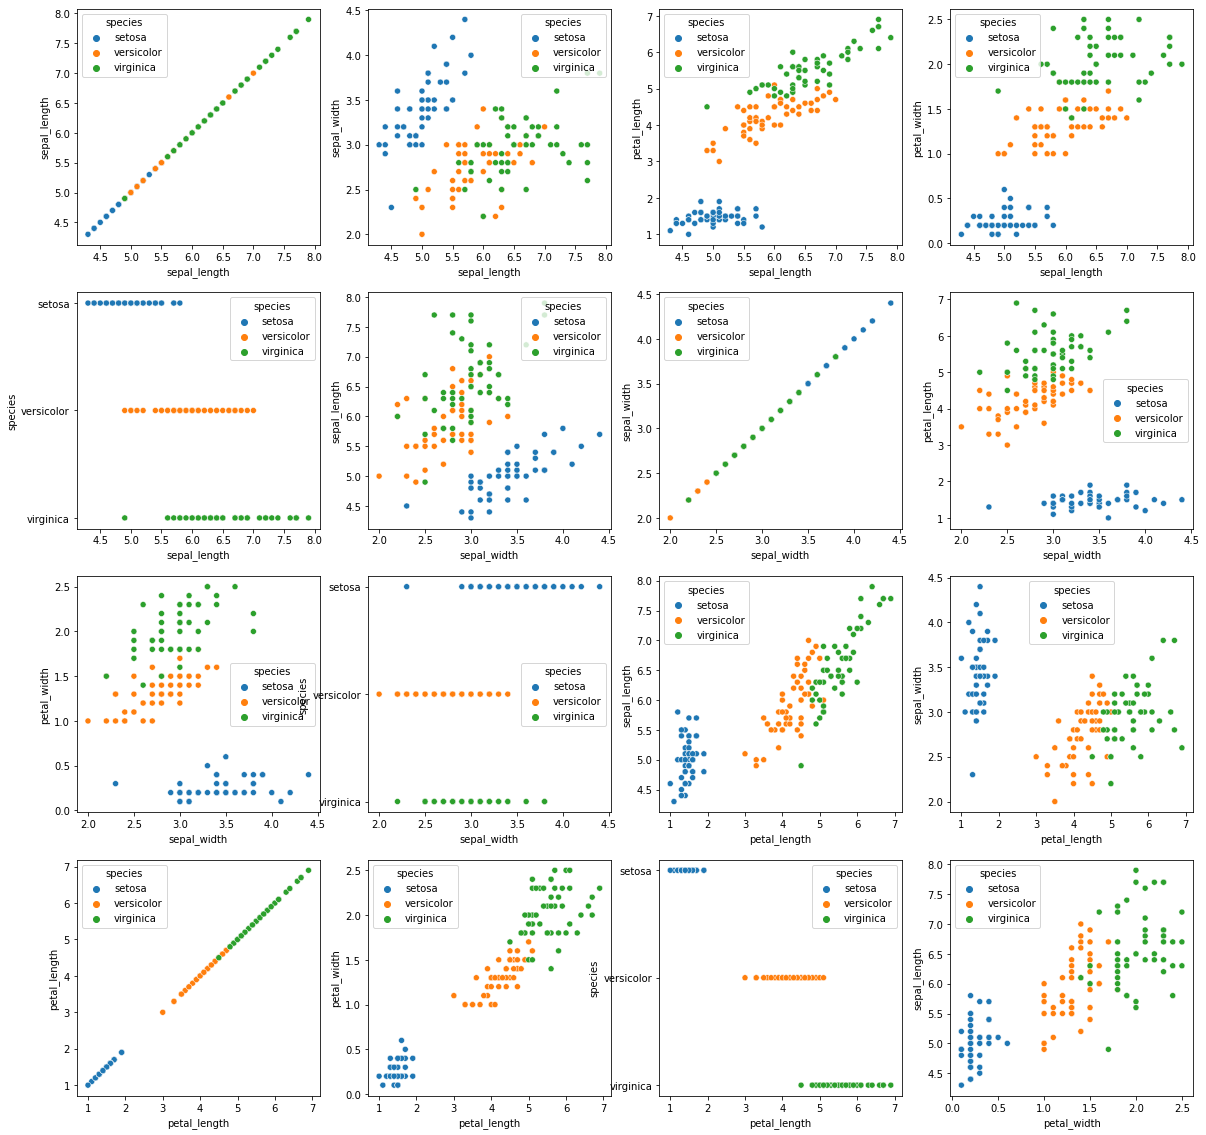

In [7]:
#excecuting the function we defined
scatterplotmatrix()

In [8]:
# we can see that this class in the target variable are pretty well separated.
#In, this case, Logistic Regression cannot be used because of its unstability in well separated data.
#Linear Discriminant Analysis could make a good model, let's see how well it performs.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [10]:
#dividing feature set and target set
x=np.asanyarray(df.drop('species',axis=1))
y=np.asanyarray(df['species'])

In [11]:
#dividing the data in training and testing set, we train the model on training set and testing it on the testing set. 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

#here test_size is 0.2, which shows that training set contains 80% of the original given data.
# i.e Model is going to be trained on 80% of the data and will be tested on remaining 20% of the data.

In [12]:
print("test shape :",x_test.shape,y_test.shape)
print("train shape :",x_train.shape,y_train.shape)

test shape : (30, 4) (30,)
train shape : (120, 4) (120,)


In [13]:
#call LinearDiscriminantAnalysis function
lda=LinearDiscriminantAnalysis()

In [14]:
#training the LDA model with training data set.
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [15]:
#predicting the testing dataset
yhat=lda.predict(x_test)

In [16]:
#confusion matrix to see false positive and false negative in prediction.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]], dtype=int64)

In [17]:
#off diagnol entries in confusion matrix shows false prediction
#here 2 predictions are false out of 30.

In [18]:
#checking accuracy of model
from sklearn import metrics
print(metrics.accuracy_score(yhat,y_test))

0.9333333333333333


In [19]:
#model is 93% accurate which seems pretty good, but in this kind of dataset, we could perform better.
#let's fit another model called Support Vector Machine.

In [20]:
#SUPPORT VECTOR MACHINE

In [21]:
#importing svm from scikit learn 
from sklearn import svm

In [22]:
#calling the Support Vector Clasifier with kernal 'rbf'
sv=svm.SVC(kernel='rbf')
#fitting the training set on model
sv.fit(x_train,y_train)

SVC()

In [23]:
#predicting the testing dataset 
yhat=sv.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [25]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      1.00      0.89         4
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.93      0.97      0.95        30
weighted avg       0.97      0.97      0.97        30



In [26]:
#classification_report shows a good summmary of how well our model performs.

In [27]:
confusion_matrix(yhat,y_test)

array([[16,  0,  0],
       [ 0,  4,  0],
       [ 0,  1,  9]], dtype=int64)

In [28]:
#only one prediction gives false value, better than before
#svm gives better prediction than LDA on this dataset

In [29]:
#accuracy of model
print(metrics.accuracy_score(y_test,yhat))

0.9666666666666667


In [30]:
#accuracy of this model is around 97% which is better than LDA.

In [31]:
#we have fitted a model on Fisher-Iris Dataset to quantify the morphologic variation of Iris flowers of three related species,
#basis on their sepal lenth, sepal width, petal length and petal width.